![This is an image](Quant-Trading.jpg)

<font size="3">
Please visit our website <a href="https://www.quant-trading.co" target="_blank">quant-trading.co</a> for more tools on quantitative finance and data science.
</font>

# **PRINCIPAL COMPONENT ANALYSIS FOR INTEREST RATES**

## **Use PCA as a filter**

<font size="3"> In this notebook we are showing how to use Principal Component Analysis for Interest Rates. In particular we are going to show how PCA can be used as a filter. In a previous <a href="https://quant-trading.co/principal-component-analysis-for-interest-rates/" target="_blank">notebook</a> we explain what PCA is, how you can calculate it and provided a few examples on how it is applied on interest rate curves. The application of PCA as a filter, can serve us to get a signal using the most important information of a dataset<br><br>

## **First thing to do: Import all the required libraries**

<font size="3"> Here we will be using libraries such as pandas or numpy for calculations. We will also use matplotlib to make charts. We will use pandas_datareader to download data from the FRED API. If you would like to know how to do that, please take a look at our <a href="https://quant-trading.co/how-to-download-data-from-federal-reserve-fred-api/" target="_blank">notebook</a> on downloading economic and financial Data from FRED, the FED of St Louis. We also need libraries such as sklearn or scipy.optimize for more advanced calculations<br><br>  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.font_manager as font_manager
from matplotlib.ticker import FormatStrFormatter
import matplotlib.dates as mdates
formatter = mdates.DateFormatter("%Y-%m-%d")
import sklearn
from sklearn import decomposition
from sklearn import datasets
import datetime
import pandas_datareader.data as web
from math import pi, cos, sin
from scipy.optimize import minimize

## **Download yield from treasury bonds**

<font size="3">We need to download data for treasury bonds with different maturities. Fortunately, we can find series of constant maturity treasuries on FRED. That would be a theoretical yield, since all the treasuries mature at some point in time, but the Federal Reserve uses a methodology to track the yields of constant maturity bonds. We will get that information from 1 year up to 30 years to maturity using the following script:<br><br>  

In [2]:
#Parámetros de fechas
start = datetime.datetime(1980, 1, 1)
end = datetime.datetime(2024, 10, 31)

#US Treasuries

US_Rates = web.DataReader(['DGS1','DGS2','DGS3','DGS5','DGS7','DGS10','DGS30'], 'fred', start, end)
US_Rates.dropna(inplace=True)
US_Rates.reset_index(inplace=True)
US_Rates.head()

,DATE,DGS1,DGS2,DGS3,DGS5,DGS7,DGS10,DGS30
0,1980-01-02,11.89,11.39,10.77,10.52,10.51,10.50,10.23
1,1980-01-03,12.25,11.45,10.79,10.54,10.59,10.60,10.31
2,1980-01-04,12.25,11.47,10.81,10.62,10.63,10.66,10.34
3,1980-01-07,12.07,11.35,10.72,10.56,10.60,10.63,10.35
4,1980-01-08,11.94,11.26,10.67,10.52,10.55,10.57,10.28


## **Principal Component Analysis for interest rates**

<font size="3">We can use sklearn, with its a method decomposition, to get the A matrix which is quite important in PCA. Below we show an example on how to do that:<br><br> 
    
<font size="3">Remember that in PCA we want to make a linear transformation of the following type: Y = A'X . As we already metioned, we can get A from sklearn, and X is the matrix that contains the information of interest rates. X is a 7xn matrix in this case <br><br>  

In [3]:
pca = decomposition.PCA(n_components=7)
matrix_A = pca.fit(US_Rates[['DGS1','DGS2','DGS3','DGS5','DGS7','DGS10','DGS30']]).components_
matrix_A

array([[ 0.39825176,  0.40335276,  0.39802213,  0.3846276 ,  0.37256644,
         0.35885018,  0.32367095],
       [ 0.58513767,  0.34110808,  0.17144884, -0.0911691 , -0.24480187,
        -0.37394448, -0.5511717 ],
       [ 0.58674098, -0.1307027 , -0.379132  , -0.36856894, -0.24473813,
         0.07696616,  0.54152299],
       [ 0.35031375, -0.48096887, -0.3610499 ,  0.24655607,  0.3629365 ,
         0.32917769, -0.46338045],
       [ 0.12962773, -0.32497991,  0.00136822,  0.53383149,  0.09252116,
        -0.70795212,  0.28783747],
       [ 0.04278993, -0.32920695,  0.33050195,  0.36952952, -0.72903819,
         0.33483086, -0.01999539],
       [-0.11571694,  0.50847656, -0.65486806,  0.47496181, -0.26379878,
         0.06166383, -0.01510146]])

In [4]:
#The shape of the A matrix is 7x7
matrix_A.shape

(7, 7)

In [30]:
X = np.array(US_Rates[['DGS1','DGS2','DGS3','DGS5','DGS7','DGS10','DGS30']]).T
X

array([[11.89, 12.25, 12.25, ...,  3.98,  3.96,  3.97],
       [11.39, 11.45, 11.47, ...,  3.66,  3.61,  3.63],
       [10.77, 10.79, 10.81, ...,  3.58,  3.52,  3.54],
       ...,
       [10.51, 10.59, 10.63, ...,  3.67,  3.6 ,  3.65],
       [10.5 , 10.6 , 10.66, ...,  3.81,  3.74,  3.79],
       [10.23, 10.31, 10.34, ...,  4.14,  4.08,  4.14]])

In [31]:
X.shape

(7, 11191)

<font size="3">Y is the rotated system, and its dimension is 7xn as well<br><br> 

In [11]:
Y = matrix_A.T.dot(X)
Y

array([[22.03232997, 22.23494181, 22.29068548, ...,  7.2409971 ,
         7.13892254,  7.18203305],
       [ 0.54312825,  0.67832734,  0.62656062, ...,  0.32215359,
         0.3538256 ,  0.34062773],
       [-4.41086099, -4.29131953, -4.32411838, ..., -1.88514035,
        -1.83759065, -1.87490466],
       ...,
       [-6.55738112, -6.52218737, -6.55089866, ..., -2.52022004,
        -2.46576842, -2.50496988],
       [ 1.00534412,  1.10199641,  1.11601274, ...,  0.44639147,
         0.45266994,  0.44852975],
       [ 1.18877453,  1.29360797,  1.26620529, ...,  0.46833331,
         0.47152087,  0.4685154 ]])

In [12]:
Y.shape

(7, 11191)

## **Explained variance ratio**

<font size="3">Please remember that PCA is a dimensionality reduction technique. Most of the variance of a system is usually explained by a few principal components. In this case the first PC explains 98.4% of the total variance, huge!<br><br> 

In [5]:
np.round(pca.explained_variance_ratio_,3)

array([0.984, 0.015, 0.001, 0.   , 0.   , 0.   , 0.   ])

## **Y star**

<font size="3">We woould like to create a new array called Y* or Y_star. That will only contain some of the rows of Y. Since most of the variance in the system is explained by the first 2-components, we are only going to use the first 2 rows. The rest of the elements will be zero. We can use some of the numpy functions to manipulate our array and manage to build Y*. We show that below:<br><br> 

In [19]:
Y[0:2:]

array([[22.03232997, 22.23494181, 22.29068548, ...,  7.2409971 ,
         7.13892254,  7.18203305],
       [ 0.54312825,  0.67832734,  0.62656062, ...,  0.32215359,
         0.3538256 ,  0.34062773]])

In [18]:
Y[0:2:].shape

(2, 11191)

In [14]:
np.zeros((5,11191))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
Y_star = np.concatenate((Y[0:2:], np.zeros((5,11191))))
Y_star

array([[22.03232997, 22.23494181, 22.29068548, ...,  7.2409971 ,
         7.13892254,  7.18203305],
       [ 0.54312825,  0.67832734,  0.62656062, ...,  0.32215359,
         0.3538256 ,  0.34062773],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [21]:
Y_star.shape

(7, 11191)

## **X star**

<font size="3">Now, that we have built Y*, we can create a new X* matrix. X* will be a filtered matrix, since it is built only using the strongest principal components. It is a way to recover a system from the signals that explain most of its variance. To get that X* we can use the equation X* = YA <br><br> 

In [24]:
X_star = Y_star.T.dot(matrix_A)
X_star

array([[9.09221902, 9.07206658, 8.86247351, ..., 8.07554782, 7.70320568,
        6.83186833],
       [9.25201963, 9.19990813, 8.96629723, ..., 8.1179372 , 7.72535602,
        6.82292999],
       [9.24392898, 9.20473445, 8.9796091 , ..., 8.15137801, 7.76471753,
        6.86950494],
       ...,
       [3.07224405, 3.03056537, 2.93730992, ..., 2.61888868, 2.47796553,
        2.1661385 ],
       [3.05012517, 3.0001969 , 2.90211211, ..., 2.57310575, 2.42949248,
        2.11564321],
       [3.05957143, 3.01308374, 2.91700829, ..., 2.59239814, 2.44989797,
        2.13687112]])

<font size="3">We can now compare how the original time series behaves compared to the filtered one<br><br> 

In [25]:
US_Rates_star = pd.DataFrame(X_star)
US_Rates_star

,0,1,2,3,4,5,6
0,9.092219,9.072067,8.862474,8.424726,8.075548,7.703206,6.831868
1,9.252020,9.199908,8.966297,8.490330,8.117937,7.725356,6.822930
2,9.243929,9.204734,8.979609,8.516490,8.151378,7.764718,6.869505
3,9.127288,9.098724,8.882961,8.435475,8.080448,7.703058,6.824201
4,9.034729,9.019305,8.813997,8.383461,8.038977,7.670983,6.807451
...,...,...,...,...,...,...,...
11186,3.037618,2.996995,2.905168,2.726188,2.591219,2.452138,2.144118
11187,3.000467,2.957212,2.864494,2.684680,2.549671,2.410935,2.105120
11188,3.072244,3.030565,2.937310,2.755717,2.618889,2.477966,2.166138
11189,3.050125,3.000197,2.902112,2.713569,2.573106,2.429492,2.115643


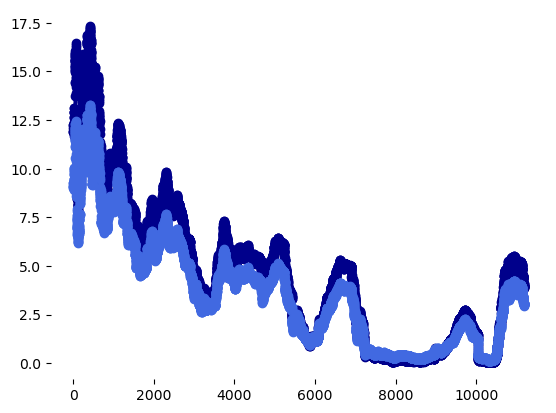

In [28]:
plt.plot(US_Rates['DGS1'],color='darkblue',marker='o')
plt.plot(US_Rates_star[0],color='royalblue',marker='o')
plt.axis([None, None, None, None])
plt.box(on=None)
plt.show()

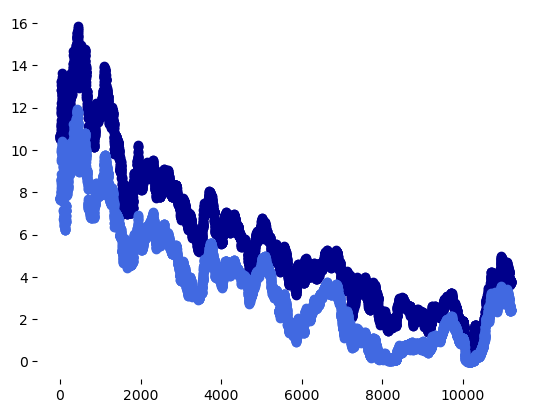

In [29]:
plt.plot(US_Rates['DGS10'],color='darkblue',marker='o')
plt.plot(US_Rates_star[5],color='royalblue',marker='o')
plt.axis([None, None, None, None])
plt.box(on=None)
plt.show()

<font size="3">You can notice that the observations move together. They only have slight differences in the level. <br><br> 

<font size="3"> We hope this content has been useful. If you want to make a donation please click on the button below. It helps us with this website maintenance. 

[![paypal](https://www.paypalobjects.com/en_US/i/btn/btn_donateCC_LG.gif)](https://www.paypal.com/cgi-bin/webscr?cmd=_s-xclick&hosted_button_id=29CVY97MEQ9BY)